In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "rnn"
label_idx = 5
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(5, 'rnn', 1, '5_rnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

epoch      train loss          valid loss     root_mean_squared_error
0          11306.9543          11214.0271            97.959       


1          11189.8693          11107.2851           97.7832       


2          11108.1244          11027.3922           97.6905       


3          11038.4607          10947.525            97.4904       


4          10994.8439          10944.872             97.614       


5          10954.0444          10849.7483           97.2964       


6          10902.6942          10838.8929           97.4443       


7          10847.4137          10792.7677            97.481       


8          10777.915           10639.1662           96.8402       


9          10692.7513          10640.3338           97.0024       


10         10586.4391          10593.943            97.2289       


11         10454.8223          10399.8428           96.6262       


12         10293.6041          10212.0612           96.2363       


13         10097.6218          9798.8018             94.575       


14         9863.0907           9481.6794            93.3689       


15          9583.25            9590.4298            94.5335       


16         9252.0146            9138.347             92.855       


17         8877.0749           8328.9159            89.0592       


18          8450.684           8269.3428            89.4391       


19         7981.2202           7742.3818            87.0419       


20         7469.9359           7314.5939             85.127       


21         6934.8947           6658.7962             81.444       


22         6385.1117           7034.3366            83.8556       


23         5822.6999            5149.734            71.7437       


24         5202.0308           5000.7782             70.71        


25         4504.6015           4228.9687            65.0119       


26         3753.6878           3926.6074            62.6544       


27         2996.9664           2816.1949            53.0382       


28         2270.1978           2115.1509            45.8612       


29         1614.7711           1163.6566            33.6511       


30         1066.1996            954.6165            30.8186       


31          646.963             417.6799            18.8014       


32          359.4647            241.0339            15.3706       


33          193.3802            172.6249            11.0576       


34          94.1598             24.2706              4.4614       


35          56.2563             11.9251              3.2454       


36          66.7261             243.8909            14.7809       


37          46.8523             174.1694            13.0119       


38          45.8226              14.623              3.7265       


39          35.3945             19.2154              4.2747       


40          40.3676             34.9886              5.8629       


41          36.3677             25.9961              4.8292       


42          35.3563             19.7231              4.3619       


43          36.6323             12.9497              3.4474       


44          33.0974             23.0557              4.6718       


45          31.8081             25.7264              4.9503       


46          33.2914              15.155              3.7444       


47          39.1712             90.8435              8.9237       


48           28.578             10.4736              3.0979       


49          32.0883             52.7806              7.1691       


50          30.3337             19.2375              4.2784       


51          37.1809             18.5243              4.0608       


52          33.5085             74.0646              7.7652       


53           32.438             212.3414            14.4377       


54          27.5767             33.9089              5.5621       


55          34.1812             12.1241              3.3407       


56          35.7622             37.5304              5.7327       


57          38.3771             24.8231              4.7252       


58          34.1409             37.3221              5.996        


59          34.5753             27.9925              5.0365       


60           30.461             69.5531              8.2263       


61          28.3279             13.4849              3.4666       


62          29.8001             28.2889              4.6934       


63           28.873             12.5831              3.4196       


64          30.2061             46.9761              6.4721       


65          31.1532            1858.4515            37.2956       


66          32.0227             106.0206            10.1346       


67          31.2133              44.516              6.2053       


68          28.4575              24.629              4.3932       


69          30.9678             11.0839              3.1699       


70          32.1915              35.752              5.6303       


71          30.0401              43.583              6.4874       


72          28.3667              30.21               5.0928       


73          28.5139             76.6259              7.4985       


74          28.6159             189.9233            13.6455       


75          26.4715             44.4001              6.5237       


76          25.8097             606.7719            23.8305       


77          28.9346             24.9837              4.7871       


78          27.4143             15.6515              3.8475       


79          28.2131             16.7532              3.6719       


80          33.0259             39.9128              6.0302       


81          31.3718             761.5562            26.7896       


82          29.8686             541.1523            22.5103       


83          28.6722             79.9809              7.7177       


84          30.3229             105.1113             9.729        


85          31.0494             1213.251            32.1739       


86          31.0435             708.2074            26.5222       


87          28.1653             31.8572              5.2187       


88          32.0143             902.595             28.4584       


89          32.8703             15.4652              3.8446       


90           27.245             73.2194              8.4894       


91          27.7689             649.2491            25.3959       


92          27.7983             168.8242            12.9552       


93          26.3146             460.1976            18.0696       


94          30.8179             96.5335              8.7763       


95          23.4128             18.7551              4.2107       


96          31.8922              62.426              7.2673       


97          25.7137             341.5028            17.3026       


98          21.7175             50.2758              6.3189       


99          24.0523             92.7166              8.7782       


100          22.796              9.3821              2.9498       


101         30.9831             31.7318              5.5737       


102         22.9773             29.8872              5.3792       


103         26.6223             269.5574            15.9336       


104         30.0123             16.7987              3.9142       


105          26.347             635.6569            24.7555       


106         24.1997             244.7866            13.6281       


107         26.2434              8.0671              2.7853       


108         21.9272             133.0988            10.9384       


109         31.9855              12.808              3.5003       


110         26.4571             138.4361            11.6382       


111         28.0529             34.1251              5.2294       


112         25.1872             56.6093              7.3688       


113         24.6209             41.1188              5.7714       


114         24.5057              4.0114              1.9647       


115         24.6664             459.9708            19.6781       


116         31.5327             158.5033            11.7482       


117         21.4523             22.6461              4.6297       


118         30.1547              11.666              3.287        


119         27.4782             42.4523              6.4874       


120         29.8362             312.2805            16.3999       


121          27.03              65.0624              7.9535       


122         20.0672             111.8826            10.3517       


123         30.2533             147.2537            11.3751       


124         24.3087             40.8446              5.6133       


125         23.4282             32.2321              5.0267       


126         22.3216             730.1429            26.1897       


127         22.7848             85.8441              8.8012       


128          26.131              17.671              3.7629       


129         26.1515             46.5621              6.5557       


130         23.3653             15.8791              3.7241       


131         28.1062             64.0755              7.8791       


132         25.0583             80.9912              7.3264       


133         28.6693             43.5403              5.8512       


134         28.3793             24.0803              4.4058       


135         24.7845             25.4966              4.8783       


136         28.5269             48.3091              6.1674       


137         27.5541             17.5241              4.1453       


138         28.7111              36.142              5.3027       


139         22.2226             93.1128              8.1677       


140         24.5523              5.8404              2.379        


141         28.2202              9.7937              2.779        


142         27.2086             23.3056              4.2652       


143         28.4992             40.8923              6.2929       


144         22.3547              5.0565              2.1622       


145         28.0755             39.7656              5.5302       


146         18.6195             35.8906              5.8496       


147         23.6941             10.8235              3.0268       


148         23.5962             19.8535              3.7751       


149         30.8973              9.5567              2.8889       


150          28.257             24.9268              4.8411       


151         29.7556             12.0122              2.9834       


152         27.7022             41.8266              5.8277       


153         32.3509              12.87               3.4816       


154         25.5767              16.991              3.8003       


155         26.2777             34.1603              4.9124       


156         25.6744              7.2758              2.4665       


157         28.0802             12.8173              3.5142       


158         21.8569              8.0318              2.4821       


159         20.7296              2.9608              1.5939       


160         23.7351             29.7976              4.8114       


161         24.2903             28.3505              5.1852       


162         24.4242             18.6044              4.2629       


163         25.7837             36.4977              6.0139       


164         23.5054              5.1046              2.2295       


165         25.0478             12.5699              3.4265       


166         21.5855             24.9485              4.4545       


167          27.321             12.5839              3.4649       


168         22.6892              2.8346              1.6384       


169         24.9433             23.9344              4.3053       


170         21.6088              4.5394              2.1047       


171         25.0856              7.0772              2.5509       


172         22.7443              8.8757              2.864        


173         24.0829              3.8035              1.9269       


174         22.4355             12.6638              3.3545       


175          29.27              14.7207              3.8201       


176         21.2192             15.4457              3.9127       


177         23.1827             35.3078              5.5285       


178         22.4405              5.2361              2.2384       


179         25.1382             26.8242              5.1706       


180         21.3823              2.9205              1.6842       


181         22.9971              5.2476              2.2554       


182         24.5039              8.7589              2.7747       


183          27.17               7.4085              2.7079       


184         29.5502              3.1034              1.756        


185         26.0659              2.6038              1.6016       


186         25.2977              2.5946              1.5805       


187         26.5183              3.7597              1.9263       


188         19.1585              5.8129              2.374        


189         23.4374             13.2441              3.6305       


190         21.9793             13.6496              3.6831       


191         23.9355              3.3504              1.827        


192         28.1621              3.7277              1.8896       


193         23.3823              2.9164              1.5723       


194         31.8064              2.2679              1.4685       


195         20.6768              5.3213              2.2825       


196          25.77               7.6296              2.7111       


197         25.6882              2.0219              1.361        


198         24.9499              6.3188              2.4782       


199         25.8969              6.5515              2.5353       


# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

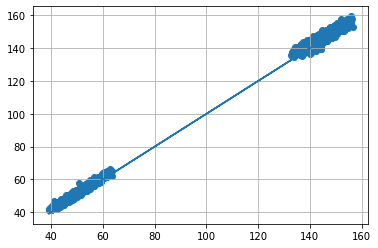

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

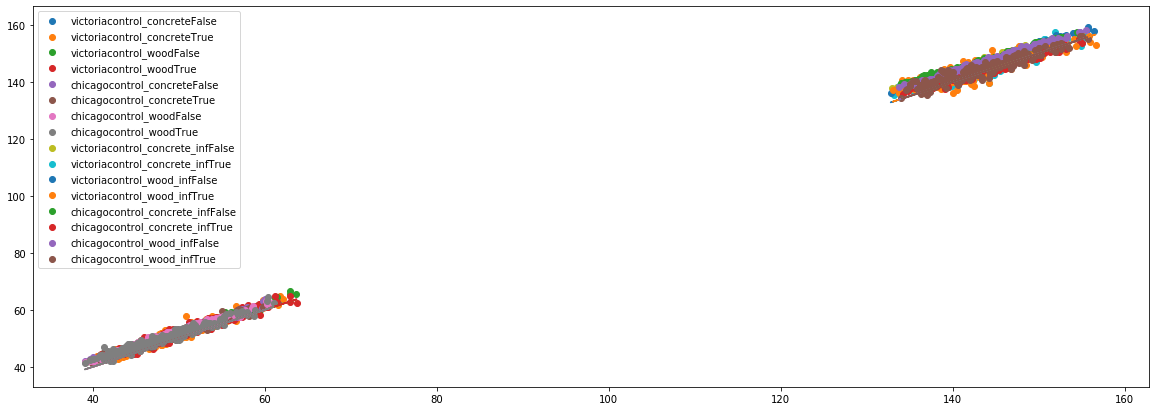

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);